In [1]:
# This scrapes data from FITS headers taken with the LBTI instrument
# (Python 3.5)

# Created by E.S., 2018 October

In [2]:
## For a demo of how this notebook works, download the fake FITS files in the directory
## YOURUSERNAME@lbti-cdata:/mnt/iscsi/lmircam/L0/fake_fits
## to a local directory /fake_fits/ which sits within the directory this notebook is in.
## Then proceed through the following steps. Edit this notebook as you wish once you are 
## ready to run it on your own data.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
import sys
import glob, os
%matplotlib inline

In [2]:
## PRIMARY USER INPUTS HERE

dirTreeStem = './fake_fits/' # local directory containing FITS files
csv_meta_data_table = 'meta_data_table.csv' # csv table which will contain FITS header information
block_diagram = 'block_diagram.pdf' # name of diagram of FITS header quantities
#nightstring = '180507' # YYMMDD of observation (UT time)

In [3]:
# change current working directory

os.chdir(dirTreeStem)

In [4]:
# read in files and extract meta-data from the FITS header fields

counter = 0
for f in glob.glob('*.fits'): # loop over FITS file names in the directory
    counter += 1 # count loops
    #print('\r', 'Reading in header info from frame '+str(f)+'...', end='')
    print('Reading in header info from frame '+str(f)+'...')
    sys.stdout.flush()
    
    image, header = fits.getdata(f,0,header=True)

    # initialize dictionary with empty lists for each key, if this is first loop iteration
    if (counter==1):
        data_ascii = {}
        for k in header:
            data_ascii[k] = [] 
        data_ascii['NODPOS'] = [] # manually add in header keys that don't appear in all frames
        data_ascii['DATAFLAG'] = []
        data_ascii['BADROWS'] = []
        data_ascii['FRAMENUM'] = []
        
    # append data from frames   
    for l in data_ascii:
        if l in header:
            data_ascii[l].append(header[l])
        else:
            if (l!='FRAMENUM'):
                data_ascii[l].append(np.nan) # if a flag doesn't appear in the header
            else:
                split_underscore = f.split("_") # to get frame number
                split_final = split_underscore[2].split(".")
                data_ascii[l].append(split_final[0])

Reading in header info from frame lm_180507_009016.fits...
Reading in header info from frame lm_180507_009012.fits...
Reading in header info from frame lm_180507_009000.fits...
Reading in header info from frame lm_180507_009001.fits...
Reading in header info from frame lm_180507_009018.fits...
Reading in header info from frame lm_180507_009002.fits...
Reading in header info from frame lm_180507_009003.fits...
Reading in header info from frame lm_180507_009006.fits...
Reading in header info from frame lm_180507_009010.fits...
Reading in header info from frame lm_180507_009008.fits...
Reading in header info from frame lm_180507_009013.fits...
Reading in header info from frame lm_180507_009005.fits...
Reading in header info from frame lm_180507_009004.fits...
Reading in header info from frame lm_180507_009019.fits...
Reading in header info from frame lm_180507_009014.fits...
Reading in header info from frame lm_180507_009015.fits...
Reading in header info from frame lm_180507_009009.fits.

In [5]:
# convert to pandas dataframe

df_init = pd.DataFrame()
data_ascii_df = df_init.from_dict(data_ascii, orient='columns')

In [6]:
# write to file for reference

data_ascii_df.to_csv(csv_meta_data_table)

In [7]:
# read in the file again as a pandas dataframe 

df = pd.read_csv(csv_meta_data_table) # read

df.sort_values(["FRAMENUM"], inplace=True) # sort table by frame number (a few are out of order)
df = df.reset_index(drop=True) # reset indices and don't keep the old ones

# Display method 1: print frames/keys of interest 

In [8]:
# print all FITS header keywords

for i in range(0,len(df.keys())):
    print(df.keys()[i])

Unnamed: 0
ACTEXP
AGE_STOP
BADROWS
BAYXCUR
BAYXREQ
BAYYCUR
BAYYREQ
BITPIX
COMMENT
CTLRTEMP
DATAFLAG
DATE-OBS
DETECTOR
DETTEMP
DET_OP
DIMMFLUX
EXPMODE
EXPTIME
FILENAME
FLAG
FPCAZM
FPCAZS
FPCELM
FPCELS
FPCPISTM
FPCPISTS
FRAME
FRAMENUM
GAIN
GROUP
IL_HORIZ
INSTRUME
ITIME
KTCREMOV
LBTTEMP
LBT_AIRM
LBT_ALT
LBT_AZ
LBT_DEC
LBT_LST
LBT_LXOS
LBT_LYOS
LBT_PARA
LBT_RA
LBT_RXOS
LBT_RYOS
LBT_UTC
LCMODES
LGAIN
LLOOPON
LMIRFW25
LMIR_FW1
LMIR_FW2
LMIR_FW3
LMIR_FW4
LOFFSETX
LOFFSETY
LOFFSETZ
LSLNULL
LSTATUS
LTTMODUL
LWCCDBIN
LWCCDFRQ
LWIND1S
MAGWHEEL
NAXIS
NAXIS1
NAXIS2
NCBMDVT
NCOADDS
NDROPS
NGROUPS
NIC_NAC
NIL_NDFW
NIL_OPW
NIL_PRW
NLDCRC
NLMGTLT
NLNCNC
NLPPLTLT
NLWNTRNS
NMCLFSS
NMCMSLD
NOCHAVG
NODPOS
NOMICFW1
NOMICFW2
NOMICLAM
NOMIC_PW
NOUTPUTS
NRAMPS
NREADS
NRESETS
OBJNAME
PCB1X
PCB1Y
PCBRAD
PCCLOSED
PCFJMPS
PCJD
PCLAMB1
PCLAMB2
PCLOOPHZ
PCMSNR1
PCMSNR2
PCPHMCS1
PCPHMCS2
PCPHMEN1
PCPHMEN2
PCPHMSN1
PCPHMSN2
PCPHSTD1
PCPHSTD2
PCPLDG
PCPLIG
PCPLPG
PCPLSP01
PCPLSP1
PCSSPER
PCTIPSP
PCTLTSP
PID
PIL_VERT
PI

In [9]:
# print rows of selected info

for t in range(0,20):
    print('FRAMENUM: '+str(df['FRAMENUM'][t])+
          '| FW3: '+str(df['LMIR_FW3'][t])+
          '| ACTEXP: '+str(df['ACTEXP'][t])+
          '| RA: '+str(df['LBT_RA'][t])+
          '| DEC: '+str(df['LBT_DEC'][t]))

FRAMENUM: 9000| FW3: Open| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.969
FRAMENUM: 9001| FW3: Open| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.969
FRAMENUM: 9002| FW3: Open| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.972
FRAMENUM: 9003| FW3: Open| ACTEXP: 145976| RA:  19:50:47.008| DEC:   8:52:05.967
FRAMENUM: 9004| FW3: Open| ACTEXP: 145976| RA:  19:50:47.010| DEC:   8:52:05.972
FRAMENUM: 9005| FW3: Open| ACTEXP: 145976| RA:  19:50:47.010| DEC:   8:52:05.972
FRAMENUM: 9006| FW3: Open| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.982
FRAMENUM: 9007| FW3: Lgrism6AR| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.970
FRAMENUM: 9008| FW3: Lgrism6AR| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.970
FRAMENUM: 9009| FW3: Open| ACTEXP: 145976| RA:  19:50:47.010| DEC:   8:52:05.969
FRAMENUM: 9010| FW3: Open| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.976
FRAMENUM: 9011| FW3: Open| ACTEXP: 145976| RA:  19:50:47.009| DEC:   8:52:05.972
FRAMENUM: 9012| FW

# Display method 2: put quantities from the whole 
# data set into a block diagram

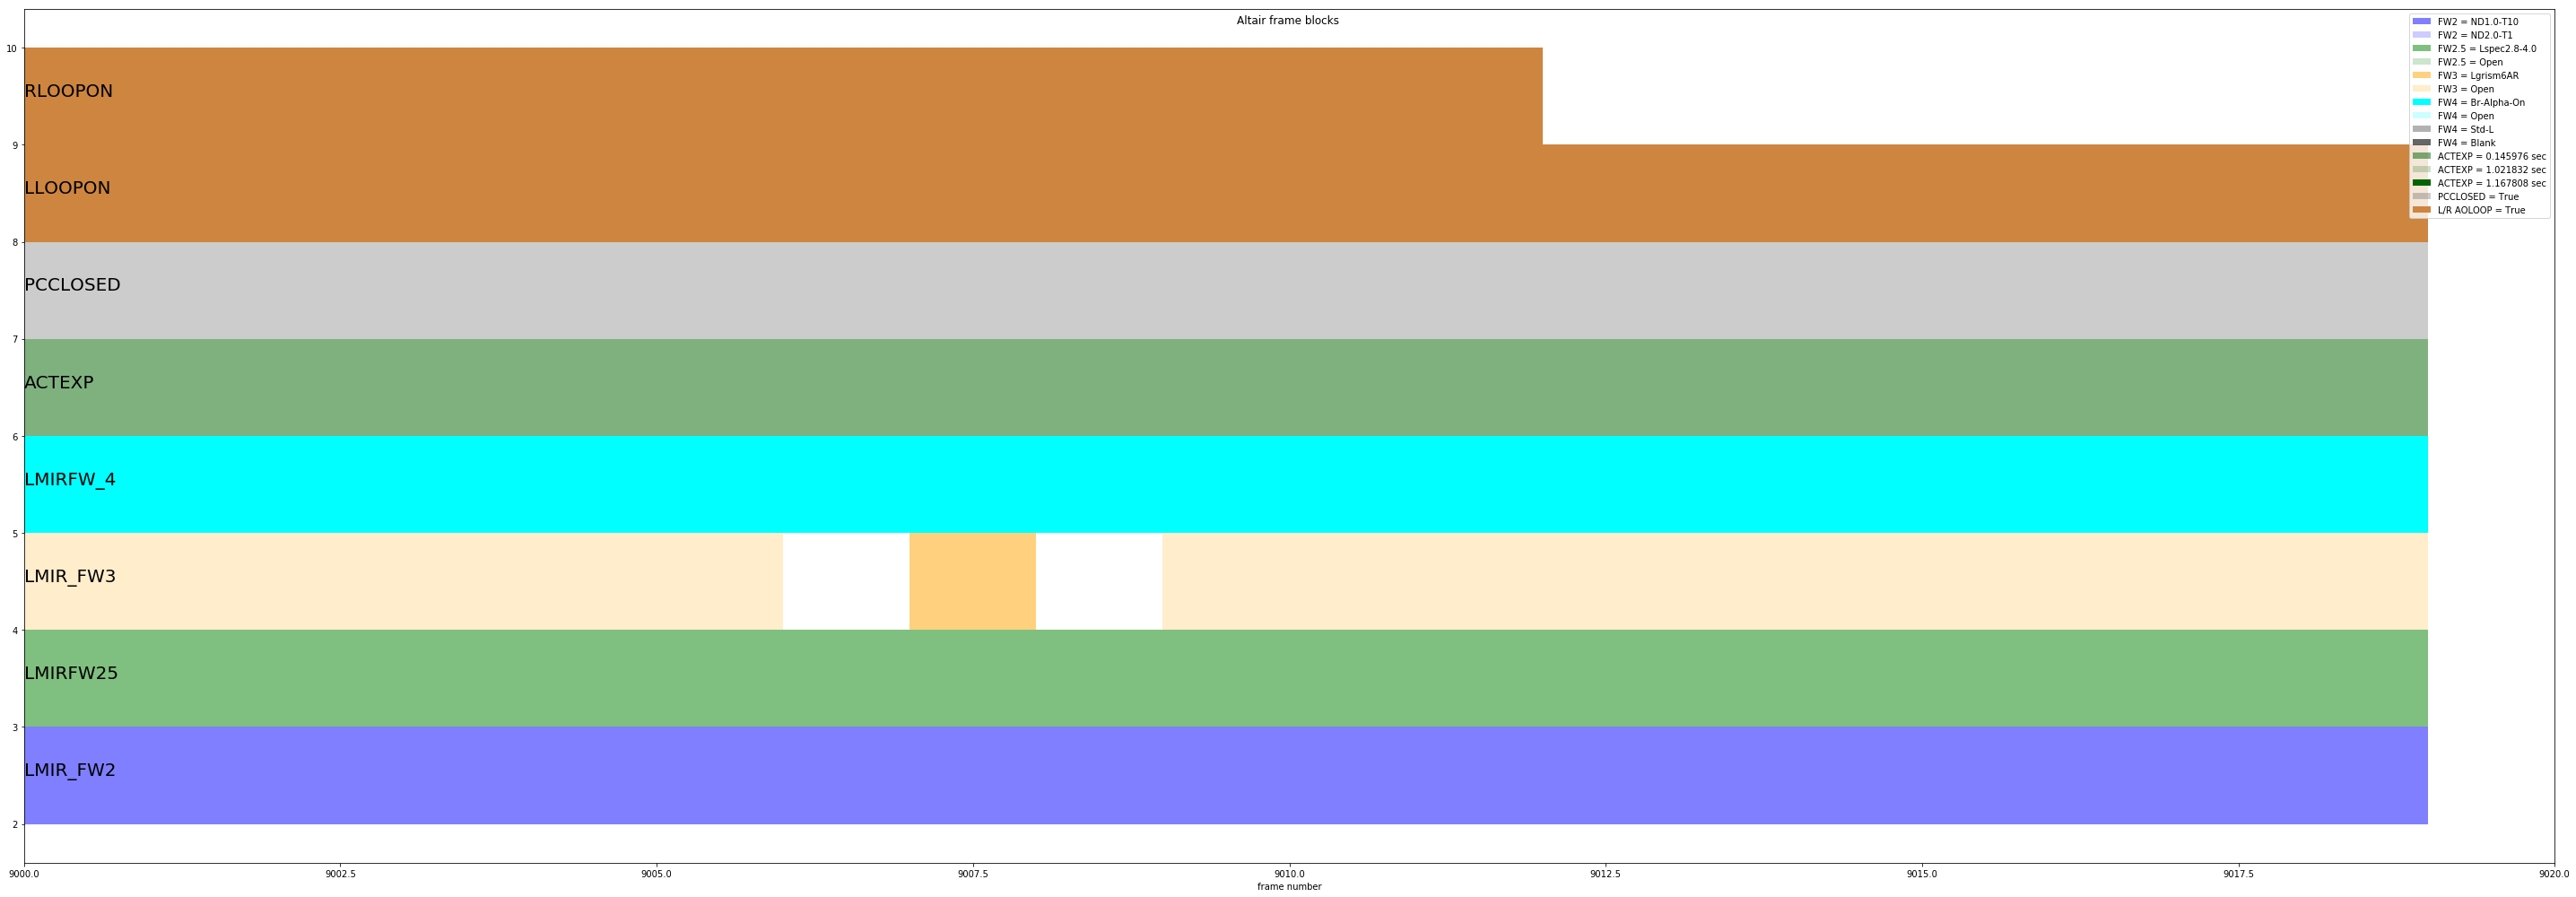

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(40,14)


# LMIR FW2
ax.fill_between(df["FRAMENUM"], 2, 3, where=df["LMIR_FW2"]=="ND1.0-T10", \
                facecolor='blue', label='FW2 = ND1.0-T10', alpha=0.5)
ax.fill_between(df["FRAMENUM"], 2, 3, where=df["LMIR_FW2"]=="ND2.0-T1", \
                facecolor='blue', label='FW2 = ND2.0-T1', alpha=0.2)
ax.annotate('LMIR_FW2', xy=(9000, 2.5), size=20, xycoords='data')


# LMIR FW2.5
ax.fill_between(df["FRAMENUM"], 3, 4, where=df["LMIRFW25"]=="Lspec2.8-4.0", \
                facecolor='green', label='FW2.5 = Lspec2.8-4.0', alpha=0.5)
ax.fill_between(df["FRAMENUM"], 3, 4, where=df["LMIRFW25"]=="Open", \
                facecolor='green', label='FW2.5 = Open', alpha=0.2)
ax.annotate('LMIRFW25', xy=(9000, 3.5), size=20, xycoords='data')


# LMIR FW3
ax.fill_between(df["FRAMENUM"], 4, 5, where=df["LMIR_FW3"]=="Lgrism6AR", \
                facecolor='orange', label='FW3 = Lgrism6AR', alpha=0.5)
ax.fill_between(df["FRAMENUM"], 4, 5, where=df["LMIR_FW3"]=="Open", \
                facecolor='orange', label='FW3 = Open', alpha=0.2)
ax.annotate('LMIR_FW3', xy=(9000, 4.5), size=20, xycoords='data')


# LMIR FW4
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Br-Alpha-On", \
                facecolor='cyan', label='FW4 = Br-Alpha-On', alpha=1)
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Open", \
                facecolor='cyan', label='FW4 = Open', alpha=0.2)
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Std-L", \
                facecolor='grey', label='FW4 = Std-L', alpha=0.6)
ax.fill_between(df["FRAMENUM"], 5, 6, where=df["LMIR_FW4"]=="Blank", \
                facecolor='black', label='FW4 = Blank', alpha=0.6)
ax.annotate('LMIRFW_4', xy=(9000, 5.5), size=20, xycoords='data')


# Integration time
ax.fill_between(df["FRAMENUM"], 6, 7, where=df["ACTEXP"]==145976, \
                facecolor='darkgreen', label='ACTEXP = 0.145976 sec', alpha=0.5)
ax.fill_between(df["FRAMENUM"], 6, 7, where=df["ACTEXP"]==1021832, \
                facecolor='darkgreen', label='ACTEXP = 1.021832 sec', alpha=0.2)
ax.fill_between(df["FRAMENUM"], 6, 7, where=df["ACTEXP"]==1167808, \
                facecolor='darkgreen', label='ACTEXP = 1.167808 sec', alpha=1)
ax.annotate('ACTEXP', xy=(9000, 6.5), size=20, xycoords='data')


# Phase controlled?
ax.fill_between(df["FRAMENUM"], 7, 8, where=df["PCCLOSED"]==1, \
                facecolor='black', label='PCCLOSED = True', alpha=0.2)
ax.annotate('PCCLOSED', xy=(9000, 7.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(df["FRAMENUM"], 8, 9, where=df["LLOOPON"]==1, \
                facecolor='peru', label='L/R AOLOOP = True', alpha=1)
ax.annotate('LLOOPON', xy=(9000, 8.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(df["FRAMENUM"], 9, 10, where=df["RLOOPON"]==1, \
                facecolor='peru', alpha=1)
ax.annotate('RLOOPON', xy=(9000, 9.5), size=20, xycoords='data')

ax.legend(loc='upper right', bbox_to_anchor=(1., 1))

plt.xlim([9000,9020])
plt.suptitle("Data set frame blocks")
plt.xlabel("frame number")
plt.tight_layout()

# save figure
#plt.savefig(block_diagram, bbox_inches='tight')

# ... or just show figure
plt.show()

# Display method 3: old-fashioned plotting

In [11]:
# for plotting

infoOfInterest = df[np.logical_and((df['FRAMENUM'] >= 4249), (df['FRAMENUM'] <= 11381) )] # all altair frames

#infoOfInterest = df[np.logical_and((df['FRAMENUM'] >= 8000), (df['FRAMENUM'] <= 8300) )]

ut_time = pd.to_datetime(infoOfInterest['LBT_UTC'], format='%H:%M:%S.%f', utc=True)
ut_time_dec = pd.Series([val.time() for val in ut_time])

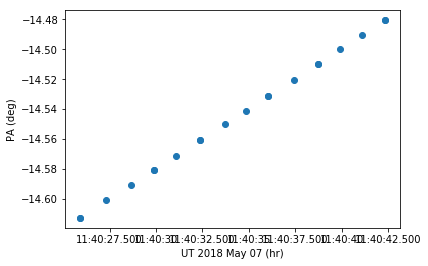

In [14]:
# PA

plt.plot(ut_time_dec,infoOfInterest['LBT_PARA'], linestyle='None', marker='o')
plt.xlabel('UT 2018 May 07 (hr)')
plt.ylabel('PA (deg)')
plt.show()

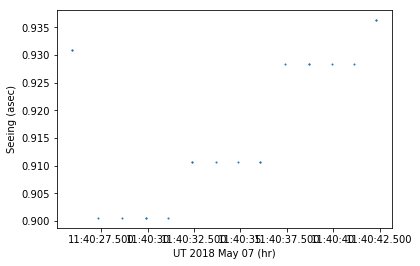

In [15]:
# Seeing

plt.plot(ut_time_dec,infoOfInterest['SEEING'], linestyle='None', marker='o', markersize=1)
plt.xlabel('UT 2018 May 07 (hr)')
plt.ylabel('Seeing (asec)')
plt.show()